<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw5.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# PHY321: Classical Mechanics 1
**Homework 5, due Friday   February 18**

Date: **Feb 6, 2022**

### Practicalities about  homeworks and projects

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. Homeworks are available ten days before the deadline.

3. How do I(we)  hand in?  You can hand in the paper and pencil exercises as a scanned document. For this homework this applies to exercises 1-5. Alternatively, you can hand in everyhting (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical exercise(s) (exercise 6 here) should always be handed in as a jupyter notebook by the deadline at D2L.

### Introduction to homework 5

This week's sets of classical pen and paper and computational
exercises are a continuation of the topics from the previous homework
set and lectures from the last two weeks. We keep dealing with simple
motion problems and conservation laws; energy, momentum and angular
momentum. These conservation laws are central in Physics and
understanding them properly lays the foundation for understanding and
analyzing more complicated physics problems.

The relevant reading background is
1. chapters 3 and 4 of Taylor (there are many good examples there) and

2. chapters 10-14 of Malthe-Sørenssen.

3. For the numerical exercise, see Malthe-Sørenssen section 7.5

In both textbooks there are many nice worked out examples. Malthe-Sørenssen's text contains also several coding examples you may find useful. 

The numerical homework focuses on another motion problem where you can
use the code you developed in homework sets 3 and 4, almost entirely. Please take
a look at the posted solutions (jupyter-notebook) for homework sets 3 and 4. You
need only to change the forces at play. The problem at hand is a
classic, the gravitational force acting between the Sun and the
Earth. Here you will notice also that the standard Euler-integration
algorithm is not the best choice and we will introduce the so-called
Euler-Cromer method and the Velocity-Verlet method. These methods will
give much more stable numerical results with only few additions to
your code.

The code you develop here will also be reused when we analyze energy
conservation in homework set 6. And for those of you doing the honors
project, it serves as a starting point for the solar system variant.

### Exercise 1 (15 pt), Work-energy theorem and conservation laws

This exercise was partly discussed during the lectures of the week of February 8-12, see <https://mhjensen.github.io/Physics321/doc/pub/week6/html/week6.html>.

We will study a classical electron which moves in the $x$-direction along a surface. The force from the surface is

$$
\boldsymbol{F}(x)=-F_0\sin{(\frac{2\pi x}{b})}\boldsymbol{e}_x.
$$

The constant $b$ represents the distance between atoms at the surface of the material, $F_0$ is a constant and $x$ is the position of the electron.

* 1a (2pt) Is this a conservative force? And if so, what does that imply?

* 1b (4pt) Use the work-energy theorem to find the velocity $v(x)$. 

* 1c (4pt) With the above expression for the force, find the potential energy.

* 1d (5pt) Make a plot of the potential energy and discuss the equilibrium points where the force on the electron is zero. Discuss the physical interpretation of stable and unstable equilibrium points. Use energy conservation. Recommended read here  is Malthe-Sørenssen chapter 11.3.2.

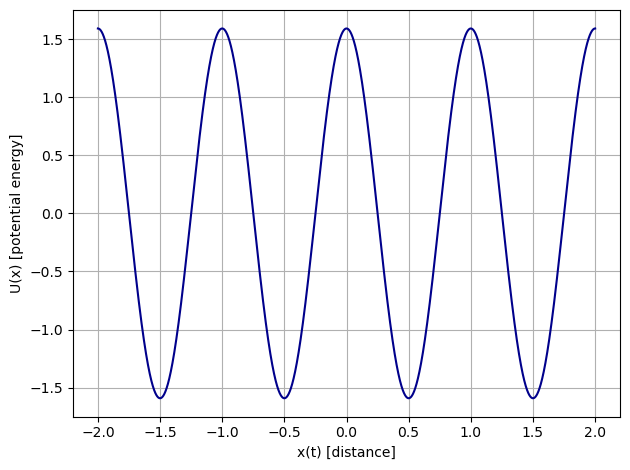

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

deltaX = 0.0001
F0 = 10.0
b = 1.0

x0 = -2.0
xf = 2.0 
n = int(np.ceil((xf-x0)/deltaX))
x = np.zeros(n)

for i in range(n):
    x[i] = x0+i*deltaX
U = np.zeros(n)
U = F0*b/(2*np.pi)*np.cos(2*np.pi*x/b)

plt.plot(x, U, color = "darkblue")
plt.xlabel("x(t) [distance]")
plt.ylabel("U(x) [potential energy]")
plt.tight_layout()
plt.grid()
plt.show()

#### Observing the plot, you can see that there  are unstable points where the function has a maxima and vice versa for the stable points. Also, at the minima is where there is the least Potential Energy and the most Kinetic Energy, and vice versa for the maxima.

### Exsercise 2 (15pt), Rocket, Momentum and mass

Taylor exercise 3.11.   This exercise is meant to illustrate momentum conservation or not. 
This exercise was partly discussed during the lectures, see the notes from the week of February 8-12 on [Energy and Momentum etc, see the part on Momentum conservation](https://mhjensen.github.io/Physics321/doc/pub/week6/html/week6.html). Taylor's chapter 3.2 covers also this example.

### Exercise 3 (10pt), More Rockets

Taylor exercises 3.13 (5pt) and 3.14 (5pt). This is a continuation of
the previous exercise and most of the relevant background material can
be found in Taylor chapter 3.2.

### Exercise 4 (10pt), Center of mass

Taylor exercise 3.20. Here Taylor's chapter 3.3 can be of use. This
relation will turn out to be very useful when we discuss systems of
many classical particles.

### Exercise 5 (10pt), Warming up for the Earth-Sun system, Scaling the Equations

The aim of this exercise (as well as the next) is to study the motion
of objects under the influence of the gravitational force.  We will
limit ourselves to the Earth-Sun system. Here we will scale the
equations and sketch our first algorithm for solving the equations,
namely using Euler's method again, as we did in homework sets 3 and 4.  This part
together with the numerical part forms also the entry point for the
solar system honors project. Furthermore, we will reuse parts of these
results when analyzing energy conservation in homework 6.

We will limit ourselves (in order to test the algorithm) to a
hypothetical solar system with the Earth only orbiting around the sun.
The only force in the problem is gravity. Newton's law of gravitation
is given by a force $F_G$

$$
F_G=\frac{GM_{\odot}M_{\mathrm{Earth}}}{r^2},
$$

where $M_{\odot}$ is the mass of the Sun and $M_{\mathrm{Earth}}$ is
the mass of the Earth. The gravitational constant is $G$ and $r$ is
the distance between the Earth and the Sun.  The Sun
has a mass which is much larger than that of the Earth. We can
therefore safely neglect the motion of the Sun in this problem.

We assume that the orbit of the Earth around the Sun 
is co-planar, and we take this to be the $xy$-plane.
Using Newton's second law of motion we get the following equations

$$
\frac{d^2x}{dt^2}=\frac{F_{G,x}}{M_{\mathrm{Earth}}},
$$

and

$$
\frac{d^2y}{dt^2}=\frac{F_{G,y}}{M_{\mathrm{Earth}}},
$$

where $F_{G,x}$ and $F_{G,y}$ are the $x$ and $y$ components of the
gravitational force.

We will use so-called astronomical units when rewriting our equations.
Using astronomical units (AU as abbreviation)it means that one
astronomical unit of length, known as 1 AU, is the average distance
between the Sun and Earth, that is $1$ AU = $1.5\times 10^{11}$ m.  It
can also be convenient to use years instead of seconds since years
match better the time evolution of the solar system. The mass of the
Sun is $M_{\mathrm{sun}}=M_{\odot}=2\times 10^{30}$ kg. The mass of
Earth is $M_{\mathrm{Earth}}=6\times 10^{24}$ kg with a distance 1AU.

In setting up the equations we limit ourselves to a co-planar
motion and use only the $x$ and $y$ coordinates. But you should feel
free to extend your equations to three dimensions, it is not very
difficult and the data from NASA are all in three dimensions.

[NASA](http://www.nasa.gov/index.html) has an excellent site at <http://ssd.jpl.nasa.gov/horizons.cgi#top>.
From there you can extract initial conditions in order to start your differential equation solver.
At the above website you need to change from **OBSERVER** to **VECTOR** and then write in the planet you are interested in.
The generated data contain the $x$, $y$ and $z$ values as well as their corresponding velocities. The velocities are in units of AU per day.
Alternatively they can be obtained in terms of km and km/s. 

For the system below involving only the Earth and the Sun, you
could just initialize the position with say $x=1$ AU and $y=0$ AU.

We assume that mass units can be obtained by using the fact that
Earth's orbit is almost circular around the Sun.

For circular motion we know that the force must obey the following relation

$$
F_G= \frac{M_{\mathrm{Earth}}v^2}{r}=\frac{GM_{\odot}M_{\mathrm{Earth}}}{r^2},
$$

where $v$ is the velocity of Earth. 
The latter equation can be used to show that

$$
v^2r=GM_{\odot}=4\pi^2\mathrm{AU}^3/\mathrm{yr}^2.
$$

* 5a (5pt) Show how to derive the last equation and use this to scale the differential equations, getting thus rid of the constant $G$ and the two masses. Split the differential equations for the motion in the $x$ and $y$ directions in terms of four coupled differential equations.

* 5b (5pt)  Discretize the above differential equations and set up an algorithm for solving these equations using Euler's forward algorithm and the so-called velocity Verlet method [discussed in the lecture notes](https://mhjensen.github.io/Physics321/doc/pub/week7/html/week7.html). Here you can reuse what you did in homework sets 3 and 4.

### Exercise 6 (40pt), Numerical elements, solving exercise 5 numerically

**This exercise should be handed in as a jupyter-notebook** at D2L. Remember to write your name(s). 

In homework sets 3 and 4 we:
1. studied  Euler's Method to find the position and the velocity of a falling object, including air resistance and gravity

2. and added additional forces to our model and studied a bouncing ball.

This week we will reuse our code from homework 4 (exercises 6)
and replace the air resistance and force from the ground with the
gravitational force. Then we will study the stability of the system as function of initial conditions and the time step length.

* 6a (30 pt)  Write then a program which solves the above differential equations for the Earth-Sun system using Euler's  method and the velocity Verlet method.  Find out which initial value for the velocity that gives a circular orbit and test the stability of your algorithm as function of different time steps $\Delta t$.  Make a plot of the results you obtain for the position of the Earth (plot the $x$ and $y$ values and/or if you prefer to use three dimensions the $z$-value as well) orbiting  the Sun. Discuss eventual differences between the Verlet algorithm and the Euler algorithm. 

* 6b (10pt) Consider then a planet which begins at a distance of 1 AU from the sun. Find out by trial and error what the initial velocity must be in order for the planet to escape from the sun.  Can you find an exact answer?  How does that match your numerical results?

Here we add a code-example which may aid in the above studies using Euler's forward method.

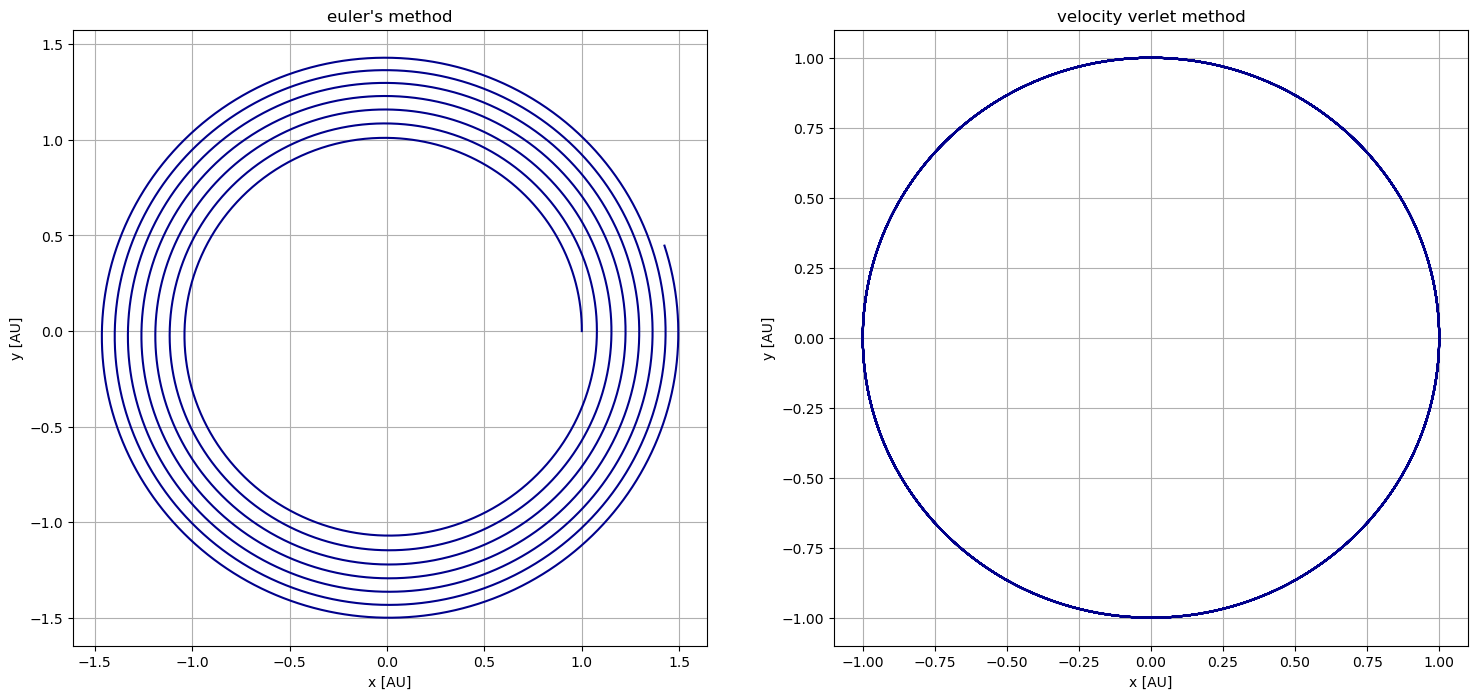

In [24]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#6a - Euler's Method

deltaT = 0.001
tf = 10 
Fourpi2 = 4*pi*pi

n = ceil(tf/deltaT)
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
r[0] = r0
v[0] = v0

# Start integrating using Euler's method
for i in range(n-1):
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**3)
    
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + deltaT*a
    r[i+1] = r[i] + deltaT*v[i]
    t[i+1] = t[i] + deltaT
    
# Plot position as function of time    
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(r[:,0], r[:,1], color='darkblue')
plt.title('G-Band Absolute Mag as a Function of B-R color')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title("euler's method")
fig.tight_layout()
plt.grid()


#6a - Velocity Verlet Method

deltaT = 0.001
tf = 10
Fourpi2 = 4*pi*pi

n = ceil(tf/deltaT)
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
r[0] = r0
v[0] = v0

# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + deltaT*v[i]+0.5*(deltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*deltaT*(a+anew)
    t[i+1] = t[i] + deltaT
    
# Plot position as function of time    
plt.subplot(1,2,2)
plt.plot(r[:,0], r[:,1], color='darkblue')
plt.title("velocity verlet method")
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
fig.tight_layout()
plt.grid()


#### Euler's method (left) does not produce a stable orbit around the sun, reguardless of small the time intervals are. This is because Euler's method does not conserve energy. The Velocity Verlet method (right), however, does produce a stable orbit around the sun. The Velocity Verlet method does conserve energy.

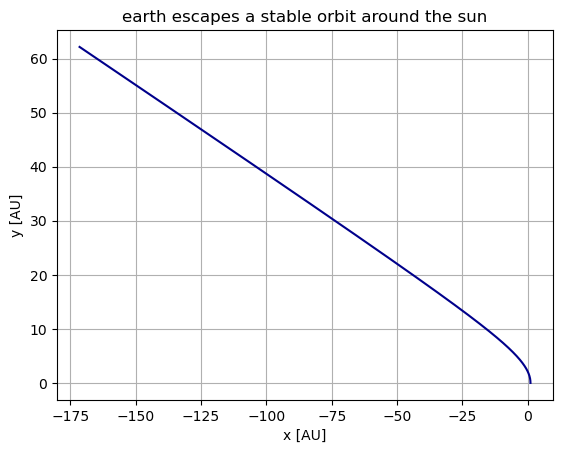

In [28]:
# 6b - earth escaping the sun

deltaT = 0.001
tf = 100
Fourpi2 = 4*pi*pi

n = ceil(tf/deltaT)
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,9.0])
r[0] = r0
v[0] = v0

# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + deltaT*v[i]+0.5*(deltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*deltaT*(a+anew)
    t[i+1] = t[i] + deltaT
    
# Plot position as function of time    
plt.plot(r[:,0], r[:,1], color='darkblue')
plt.title("earth escapes a stable orbit around the sun")
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
fig.tight_layout()
plt.grid()

#### The theoretical value for the escape velocity, is given by $v = \sqrt{8\pi^2}{r}$ and with $r=1$ AU, this means that the escape velocity is $2\pi\sqrt{2}$ AU/yr. To obtain this we required that the kinetic energy of Earth equals the potential energy given by the gravitational force. And since $GM_{\odot}=4\pi^2$, we can say that: $\frac{1}{2}M_{\mathrm{Earth}}v^2=\frac{GM_{\odot}}{r}$ When we set the velocity to 9, the Earth escapes a stable orbit around the sun, as seen by the plot above. Anything below a velocity of 9, and the Earth does not escape.